In [ ]:
#importing libraries needed for regression
#need to change classification to regression and use twitch data
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
#importing csv file and displaying data
df = pd.read_csv('/content/dairy_dataset.csv')

In [ ]:
#showing information within our df
df.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


In [ ]:
# cleaning dataset and removing columns
# taking out any values that arent numerical and don't want to test for our our regression
drop_columns = ['Total Land Area (acres)','Location', 'Number of Cows', 'Quantity in Stock (liters/kg)', 'Farm Size', 'Product ID', 'Date', 'Product Name', 'Brand', 'Storage Condition','Customer Location', 'Sales Channel', 'Approx. Total Revenue(INR)', 'Production Date', 'Expiration Date','Shelf Life (days)', 'Minimum Stock Threshold (liters/kg)']
df = df.drop(drop_columns, axis=1)
df.head()

,Quantity (liters/kg),Price per Unit,Total Value,Quantity Sold (liters/kg),Price per Unit (sold),Reorder Quantity (liters/kg)
0,222.40,85.72,19064.1280,7,82.24,64.03
1,687.48,42.61,29293.5228,558,39.24,181.10
2,503.48,36.50,18377.0200,256,33.81,140.83
3,823.36,26.52,21835.5072,601,28.92,57.68
4,147.77,83.85,12390.5145,145,83.07,33.40


In [ ]:
#check for missing values and dropping them
df.isnull().sum()

Quantity (liters/kg)            0
Price per Unit                  0
Total Value                     0
Quantity Sold (liters/kg)       0
Price per Unit (sold)           0
Reorder Quantity (liters/kg)    0
dtype: int64

In [ ]:
#describing the new data from our updated dataset
df.describe()

,Quantity (liters/kg),Price per Unit,Total Value,Quantity Sold (liters/kg),Price per Unit (sold),Reorder Quantity (liters/kg)
count,4325.000000,4325.000000,4325.000000,4325.000000,4325.00000,4325.000000
mean,500.652657,54.785938,27357.845411,248.095029,54.77914,109.107820
std,288.975915,26.002815,21621.051594,217.024182,26.19279,51.501035
min,1.170000,10.030000,42.516500,1.000000,5.21000,20.020000
25%,254.170000,32.460000,9946.814500,69.000000,32.64000,64.280000
50%,497.550000,54.400000,21869.652900,189.000000,54.14000,108.340000
75%,749.780000,77.460000,40954.441000,374.000000,77.46000,153.390000
max,999.930000,99.990000,99036.369600,960.000000,104.51000,199.950000


In [ ]:
#used product id because it already has an ID that matches with it's product
X = df.drop('Price per Unit', axis=1)
y = df['Price per Unit']

In [ ]:
#setting up our training and test datasets to perform our linear regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

#printing the mean square error and root mean square deviation
print("MSE is {}".format(round(mse,2)))
print("RMSE is {}".format(round(rmse,2)))

MSE is 7.78
RMSE is 2.79


In [ ]:
# addding the constant that will be the intercept for the rest of our data
#printing the results of our classification that includes all of the important information with the model
X_with_constant = sm.add_constant(X)
model = sm.OLS(y, X_with_constant).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Price per Unit   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 7.255e+04
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        01:11:58   Log-Likelihood:                -10621.
No. Observations:                4325   AIC:                         2.125e+04
Df Residuals:                    4319   BIC:                         2.129e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

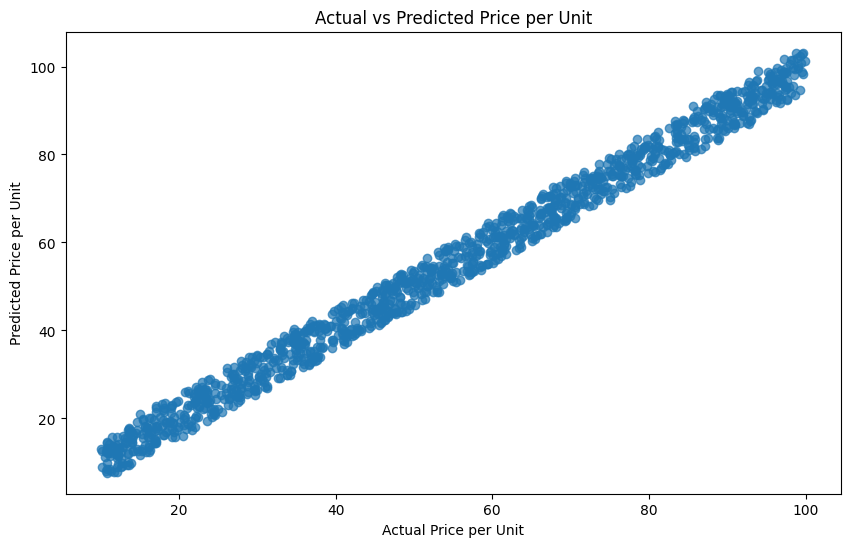

In [ ]:
#scatter plot of the actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Price per Unit')
plt.ylabel('Predicted Price per Unit')
plt.title('Actual vs Predicted Price per Unit')
plt.show()

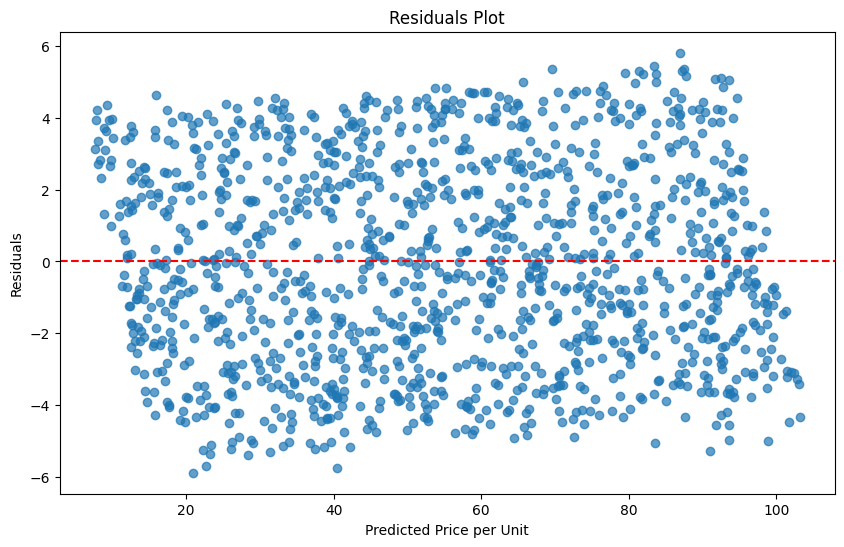

In [ ]:
#scatter plot using the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price per Unit')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

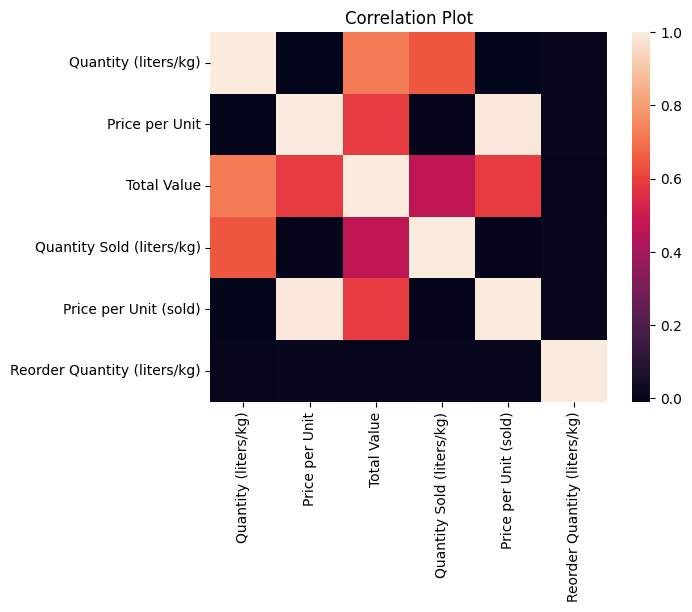

In [ ]:
#using seaborn to create heatmap for the df correlation
sns.heatmap(df.corr())
#plotting correlation matrix
plt.title('Correlation Plot')
plt.show()

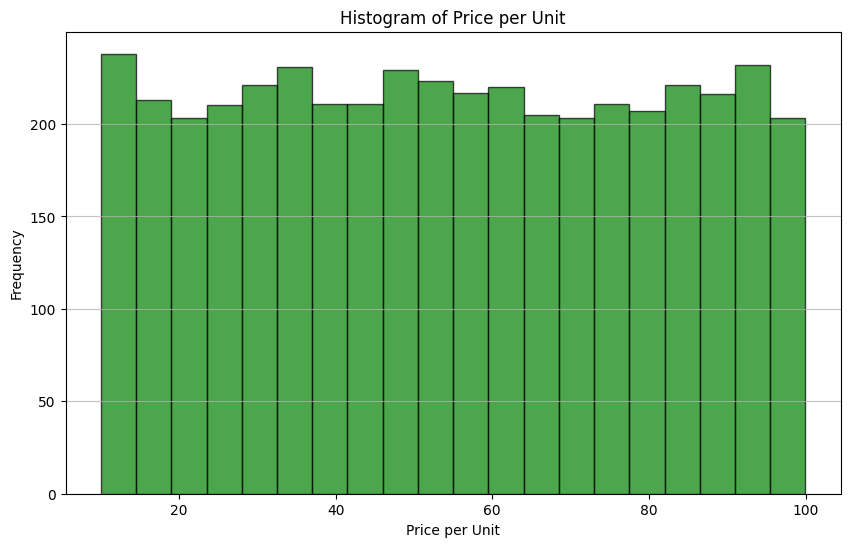

In [ ]:
#histogram used to display frequency price per unit
plt.figure(figsize=(10, 6))
plt.hist(df['Price per Unit'], bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title('Histogram of Price per Unit')
plt.xlabel('Price per Unit')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()